In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parameters = pd.read_csv('parameters.csv')
parameters.rename(columns={'Unnamed: 0':'Coef'}, inplace=True)
maxlag = 5
m_baseline_forecast = pd.read_csv('m_baseline_forecast.csv')
m_baseline_forecast


,Unnamed: 0,R0R4_3M,k1,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
0,0,NaN,Q1 07,0.933344,1.817500,5.500000,2.878960,9.167663
1,1,NaN,Q2 07,0.619953,2.191668,5.300000,2.506266,9.845725
2,2,NaN,Q3 07,0.776288,2.879213,5.300000,1.784932,10.393607
3,3,NaN,Q4 07,0.471072,2.829605,5.000000,2.101360,8.896052
4,4,0.002035,Q1 08,0.542505,2.431423,5.100000,2.386790,6.168789
...,...,...,...,...,...,...,...,...
63,63,NaN,Q4 22,0.690860,3.082181,6.066631,1.678194,5.685452
64,64,NaN,Q1 23,0.649733,2.890970,5.983963,1.676316,6.294841
65,65,NaN,Q2 23,0.611874,2.715177,5.875664,1.675096,6.624064
66,66,NaN,Q3 23,0.577024,2.553550,5.745184,1.674160,6.759679


In [3]:
m_baseline_forecast = m_baseline_forecast.set_index('k1')
m_baseline_forecast = m_baseline_forecast.drop(columns=['Unnamed: 0'])
m_baseline_forecast['Q'] = m_baseline_forecast.index
m_baseline_forecast = m_baseline_forecast.reset_index(drop=True)
m_baseline_forecast = m_baseline_forecast.drop(['Q'], axis=1)                                            
drop1 = m_baseline_forecast['R0R4_3M'].first_valid_index()
m_baseline_forecast = m_baseline_forecast.iloc[drop1:]
m_baseline_forecast = m_baseline_forecast.reset_index(drop=True)
factors = int(len(m_baseline_forecast.columns))

In [4]:
m_baseline_forecast.tail(20)

,R0R4_3M,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
44,0.000574,0.658128,2.000321,3.700000,1.845338,-0.669339
45,0.000547,-0.056563,1.408530,3.800000,2.018895,-0.119558
46,0.000586,0.511654,1.332420,3.800000,1.850141,-0.039091
47,0.000585,-0.000191,1.115730,3.700000,1.402744,0.527488
48,0.000631,-2.187179,-1.742512,3.866667,1.655733,0.426505
49,0.001247,-20.374743,-21.717944,3.866667,0.680272,-0.319746
50,NaN,14.000000,-11.212739,4.158023,0.688903,-1.408104
51,NaN,1.176722,-10.167789,4.809708,1.020688,-2.786736
52,NaN,1.097085,-7.151491,5.336852,1.080863,-2.101111
53,NaN,1.023747,17.800615,5.691021,1.852805,-0.091351


In [5]:
parameters

,Coef,R0R4_3M
0,const,0.002199
1,L1.R0R4_3M,0.029254
2,"L1.UK, GDP (q/q)",0.014511
3,"L1.UK, GDP (y/y)",-0.014608
4,"L1.UK, unemployment rate",0.000076
5,"L1.UK, inflation (HICP)",0.000121
6,"L1.UK, home prices (y/y)",0.000035
7,L2.R0R4_3M,-0.568294
8,"L2.UK, GDP (q/q)",-0.006626
9,"L2.UK, GDP (y/y)",0.020773


In [6]:
parameters_k = parameters.iloc[:1]
parameters_k

,Coef,R0R4_3M
0,const,0.002199


In [7]:
col_k = list(parameters_k.columns)
col_k

['Coef', 'R0R4_3M']

In [8]:
col_sel_k = col_k[1]


In [9]:
parameters_k = parameters_k[col_sel_k].tolist()


In [10]:
parameters_k

[0.002198684482235449]

In [11]:
parameters_v = parameters.iloc[1:]
col_v = list(parameters_v.columns)


In [12]:
col_sel = col_v[1]

In [13]:
col_sel

'R0R4_3M'

In [14]:
parameters_v = parameters_v[col_sel].tolist()

In [15]:
parameters_v

[0.0292540199752133,
 0.014511276189948503,
 -0.014607888641519668,
 7.607587795630738e-05,
 0.00012087258081144968,
 3.4987017603493176e-05,
 -0.5682938973757643,
 -0.006625868697976583,
 0.02077271762255818,
 0.00024593772965833814,
 -1.8611882949208605e-05,
 5.049090282063925e-05,
 0.4734627653277644,
 -0.007707565762218316,
 0.0013413392617408265,
 0.0006077196181077323,
 2.680989272679603e-05,
 7.801728143752226e-05,
 -0.06947882022309143,
 -0.007398320733947913,
 -0.00011562331473696348,
 -0.00024725565535996203,
 7.774151569175784e-05,
 5.493819016292702e-06,
 -0.28832078504928765,
 -0.021982721885469226,
 -0.00015096068283199966,
 -0.0003103197591787455,
 0.00011061802351297154,
 2.3048743548883427e-05,
 -0.5783982791085934,
 -0.001154829966031775,
 -4.0672127944354384e-05,
 -0.0006227100622619345,
 7.565310518519735e-05,
 1.9916813400374027e-05]

In [16]:
numerical = []
for i in range(1,maxlag+1):
    for m in range(1, (factors)+1):
        numerical.append('b'+'_Lag'+str(i)+'_Col'+str(m))
            

In [17]:
numerical

['b_Lag1_Col1',
 'b_Lag1_Col2',
 'b_Lag1_Col3',
 'b_Lag1_Col4',
 'b_Lag1_Col5',
 'b_Lag1_Col6',
 'b_Lag2_Col1',
 'b_Lag2_Col2',
 'b_Lag2_Col3',
 'b_Lag2_Col4',
 'b_Lag2_Col5',
 'b_Lag2_Col6',
 'b_Lag3_Col1',
 'b_Lag3_Col2',
 'b_Lag3_Col3',
 'b_Lag3_Col4',
 'b_Lag3_Col5',
 'b_Lag3_Col6',
 'b_Lag4_Col1',
 'b_Lag4_Col2',
 'b_Lag4_Col3',
 'b_Lag4_Col4',
 'b_Lag4_Col5',
 'b_Lag4_Col6',
 'b_Lag5_Col1',
 'b_Lag5_Col2',
 'b_Lag5_Col3',
 'b_Lag5_Col4',
 'b_Lag5_Col5',
 'b_Lag5_Col6']

In [18]:
len(parameters_v)

36

In [19]:
d1 = dict(zip(numerical,parameters_v))

In [20]:
#Create a dictionary of the columns:

In [21]:
col_regresors = list(m_baseline_forecast.columns)
col_regresors = col_regresors*10

In [22]:
d2 = {}
for i in range(len(numerical)):
        d2[numerical[i]] = col_regresors[i]


In [23]:
d1, d2

({'b_Lag1_Col1': 0.0292540199752133,
  'b_Lag1_Col2': 0.014511276189948503,
  'b_Lag1_Col3': -0.014607888641519668,
  'b_Lag1_Col4': 7.607587795630738e-05,
  'b_Lag1_Col5': 0.00012087258081144968,
  'b_Lag1_Col6': 3.4987017603493176e-05,
  'b_Lag2_Col1': -0.5682938973757643,
  'b_Lag2_Col2': -0.006625868697976583,
  'b_Lag2_Col3': 0.02077271762255818,
  'b_Lag2_Col4': 0.00024593772965833814,
  'b_Lag2_Col5': -1.8611882949208605e-05,
  'b_Lag2_Col6': 5.049090282063925e-05,
  'b_Lag3_Col1': 0.4734627653277644,
  'b_Lag3_Col2': -0.007707565762218316,
  'b_Lag3_Col3': 0.0013413392617408265,
  'b_Lag3_Col4': 0.0006077196181077323,
  'b_Lag3_Col5': 2.680989272679603e-05,
  'b_Lag3_Col6': 7.801728143752226e-05,
  'b_Lag4_Col1': -0.06947882022309143,
  'b_Lag4_Col2': -0.007398320733947913,
  'b_Lag4_Col3': -0.00011562331473696348,
  'b_Lag4_Col4': -0.00024725565535996203,
  'b_Lag4_Col5': 7.774151569175784e-05,
  'b_Lag4_Col6': 5.493819016292702e-06,
  'b_Lag5_Col1': -0.28832078504928765,
  'b

In [24]:
m_baseline_forecast['R0R4_3M'].isna()

0     False
1     False
2     False
3     False
4     False
      ...  
59     True
60     True
61     True
62     True
63     True
Name: R0R4_3M, Length: 64, dtype: bool

In [27]:
m_baseline_forecast

,R0R4_3M,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
0,0.002035,0.542505,2.431423,5.100000,2.386790,6.168789
1,0.001761,-0.554747,1.235576,5.300000,3.422983,2.789840
2,0.002586,-1.563698,-1.115076,5.800000,4.771617,-2.848316
3,0.001910,-2.065366,-3.611471,6.300000,3.793341,-9.092118
4,0.001849,-1.747264,-5.806636,7.000000,3.014471,-12.461284
...,...,...,...,...,...,...
59,0.026558,0.690860,3.082181,6.066631,1.678194,5.685452
60,-0.007046,0.649733,2.890970,5.983963,1.676316,6.294841
61,-0.004317,0.611874,2.715177,5.875664,1.675096,6.624064
62,0.023590,0.577024,2.553550,5.745184,1.674160,6.759679


In [25]:
for i in m_baseline_forecast['R0R4_3M']:
    if m_baseline_forecast['R0R4_3M'].isna().idxmax() != 0:
        z = int(m_baseline_forecast['R0R4_3M'].isna().idxmax())
        values = []
        test_col = []
        for t in range(1,maxlag+1):
            cond = 'Lag'+str(t)
            for k in d2.keys():
                if cond in k:
                    equ = m_baseline_forecast[d2[k]][z-t]*d1[k]
                    values.append(equ)
        m_baseline_forecast['R0R4_3M'][z] = sum(values) + parameters_k
            


In [26]:
m_baseline_forecast['R0R4_3M']


0     0.002035
1     0.001761
2     0.002586
3     0.001910
4     0.001849
        ...   
59    0.026558
60   -0.007046
61   -0.004317
62    0.023590
63   -0.000366
Name: R0R4_3M, Length: 64, dtype: float64

In [22]:
#Definition of the predictive model:As per previous results, we are running a VAR with 2 paralell time series on which the second is the predictive regressor with a 2 level lag:
#Y = K + b11*(y-1) + b12*(y-2) + b21*(x-1) + b22(x-2)
#Y = K + Sum_Lag1 + Sum_Lag2


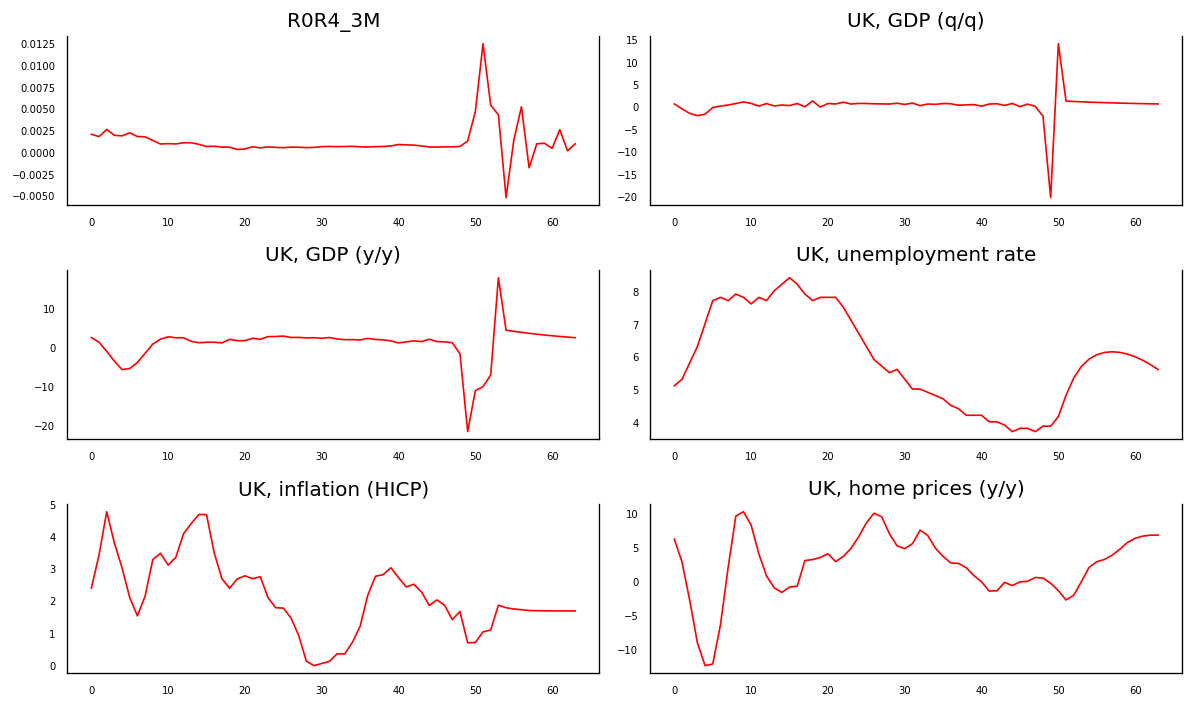

In [381]:
# Plot Favourable scenario
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = m_baseline_forecast[m_baseline_forecast.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(m_baseline_forecast.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();